In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Beispiel 1
Hauptachsentransformation zur Entkorrelierung von Datenreihen

#### Datendefinition

In [2]:
all_samples = np.array([2,3,16,10,14,9,23,11,12,8,18,10,6,5]).reshape((7,2))

#### Darstellung Originaldaten

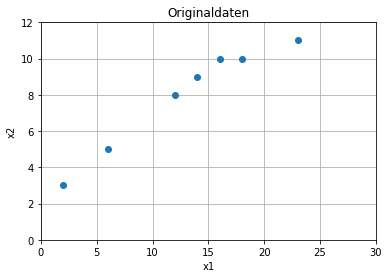

In [3]:
plt.plot(all_samples[:,0],all_samples[:,1], ls='', marker='o')
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis([0, 30, 0, 12])
plt.title('Originaldaten')
plt.show()

#### Mittelwertvektor

In [4]:
mean_vector = np.mean(all_samples,axis=0)

#### mittelwertfreie Daten

In [5]:
all_samples_mf = all_samples - np.hstack(mean_vector)

#### Kovarianzmatrix

In [6]:
all_samples_cov = 1/(all_samples.shape[0])*np.dot(np.transpose(all_samples_mf), all_samples_mf)

#### Eigenwerte, Eigenvektoren

In [11]:
eig_val, eig_vec = np.linalg.eigh(all_samples_cov)
print(eig_val)

[ 0.31438268 50.82847447]


#### Transformationsmatrix

In [8]:
klt = np.append(-eig_vec[1],-eig_vec[0]).reshape(2,2)

#### transformierte Daten

In [9]:
trans_samples = (np.matrix(klt) * np.matrix(all_samples).T).T
print(trans_samples)

[[ 2.97966488  2.03017172]
 [18.58338697  3.26461768]
 [16.35428382  3.08826826]
 [25.44704586  1.5645628 ]
 [14.12518066  2.91191884]
 [20.43720927  2.51405596]
 [ 7.43787119  2.38287057]]


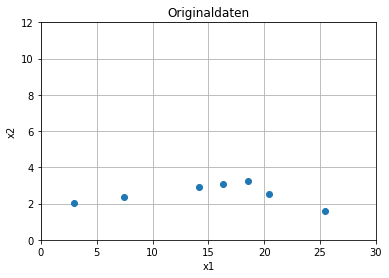

In [10]:
plt.plot(trans_samples[:,0],trans_samples[:,1], ls='', marker='o')
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis([0, 30, 0, 12])
plt.title('Originaldaten')
plt.show()

#### transformierter Mittelwert

In [12]:
trans_mean = np.matrix(klt) * np.matrix(mean_vector).T
print(trans_mean)

[[15.05209181]
 [ 2.53663797]]


#### transformierte Kovarianzmatrix

In [13]:
trans_cov = np.round(np.matrix(klt) * np.matrix(all_samples_cov) * np.matrix(klt).T, 3)
print(trans_cov)

[[50.828  0.   ]
 [-0.     0.314]]


## Beispiel 2
Auswahl signifikanter Merkmale in einfachen Ziffernbildern

In [14]:
all_samples = np.array([0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,
             1,1,1,1,1,1,0,0,1,0,1,1,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,
             0,0,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,
             1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,1,1,1,
             1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,
             1,1,1,1,0,1,1,0,1,1,0,1,1,1,1]).reshape((10,15))

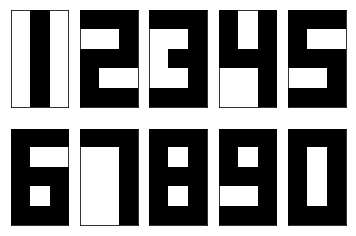

In [15]:
for i in range(all_samples.shape[0]):
    plt.subplot(2,5,i+1)
    #b1 = np.flipud(np.transpose(num[i,:].reshape((5,3))))
    b1 = np.flipud(np.transpose(all_samples[i,::-1].reshape((5,3))))
    plt.imshow(b1.T, origin='lower', cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])

In [16]:
mean_vector = np.mean(all_samples,axis=0)
print('Mean Vector:\n', mean_vector)

Mean Vector:
 [0.9 0.9 0.9 0.6 0.1 0.7 0.7 0.8 0.9 0.4 0.1 0.8 0.7 0.8 0.9]


In [19]:
all_samples_mf = all_samples - np.hstack(mean_vector)
print('Mittelwertfreie Daten:\n', all_samples_mf)

Mittelwertfreie Daten:
 [[-0.9  0.1 -0.9 -0.6  0.9 -0.7 -0.7  0.2 -0.9 -0.4  0.9 -0.8 -0.7  0.2
  -0.9]
 [ 0.1  0.1  0.1 -0.6 -0.1  0.3  0.3  0.2  0.1  0.6 -0.1 -0.8  0.3  0.2
   0.1]
 [ 0.1  0.1  0.1 -0.6 -0.1  0.3 -0.7  0.2  0.1 -0.4 -0.1  0.2  0.3  0.2
   0.1]
 [ 0.1 -0.9  0.1  0.4 -0.1  0.3  0.3  0.2  0.1 -0.4 -0.1  0.2 -0.7 -0.8
   0.1]
 [ 0.1  0.1  0.1  0.4 -0.1 -0.7  0.3  0.2  0.1 -0.4 -0.1  0.2  0.3  0.2
   0.1]
 [ 0.1  0.1  0.1  0.4 -0.1 -0.7  0.3  0.2  0.1  0.6 -0.1  0.2  0.3  0.2
   0.1]
 [ 0.1  0.1  0.1 -0.6 -0.1  0.3 -0.7 -0.8  0.1 -0.4 -0.1  0.2 -0.7 -0.8
   0.1]
 [ 0.1  0.1  0.1  0.4 -0.1  0.3  0.3  0.2  0.1  0.6 -0.1  0.2  0.3  0.2
   0.1]
 [ 0.1  0.1  0.1  0.4 -0.1  0.3  0.3  0.2  0.1 -0.4 -0.1  0.2  0.3  0.2
   0.1]
 [ 0.1  0.1  0.1  0.4 -0.1  0.3  0.3 -0.8  0.1  0.6 -0.1  0.2  0.3  0.2
   0.1]]


In [20]:
all_samples_cov = 1/(all_samples.shape[0])*np.dot(np.transpose(all_samples_mf), all_samples_mf)
print('Kovarianzmatrix:\n', all_samples_cov)

Kovarianzmatrix:
 [[ 0.09 -0.01  0.09  0.06 -0.09  0.07  0.07 -0.02  0.09  0.04 -0.09  0.08
   0.07 -0.02  0.09]
 [-0.01  0.09 -0.01 -0.04  0.01 -0.03 -0.03 -0.02 -0.01  0.04  0.01 -0.02
   0.07  0.08 -0.01]
 [ 0.09 -0.01  0.09  0.06 -0.09  0.07  0.07 -0.02  0.09  0.04 -0.09  0.08
   0.07 -0.02  0.09]
 [ 0.06 -0.04  0.06  0.24 -0.06 -0.02  0.18  0.02  0.06  0.06 -0.06  0.12
   0.08  0.02  0.06]
 [-0.09  0.01 -0.09 -0.06  0.09 -0.07 -0.07  0.02 -0.09 -0.04  0.09 -0.08
  -0.07  0.02 -0.09]
 [ 0.07 -0.03  0.07 -0.02 -0.07  0.21  0.01 -0.06  0.07  0.02 -0.07  0.04
   0.01 -0.06  0.07]
 [ 0.07 -0.03  0.07  0.18 -0.07  0.01  0.21  0.04  0.07  0.12 -0.07  0.04
   0.11  0.04  0.07]
 [-0.02 -0.02 -0.02  0.02  0.02 -0.06  0.04  0.16 -0.02 -0.02  0.02 -0.04
   0.04  0.06 -0.02]
 [ 0.09 -0.01  0.09  0.06 -0.09  0.07  0.07 -0.02  0.09  0.04 -0.09  0.08
   0.07 -0.02  0.09]
 [ 0.04  0.04  0.04  0.06 -0.04  0.02  0.12 -0.02  0.04  0.24 -0.04 -0.02
   0.12  0.08  0.04]
 [-0.09  0.01 -0.09 -0.06  0.09 

In [21]:
eig_val_cov, eig_vec_cov = np.linalg.eigh(all_samples_cov)
print(np.flip(np.sort(eig_val_cov), axis=0))

[ 9.34115128e-01  5.00685985e-01  3.02713589e-01  1.89994774e-01
  1.57422065e-01  8.24498543e-02  4.12240175e-02  1.13945880e-02
  6.59983766e-17  3.83141059e-17  1.79003698e-17  8.08142608e-18
 -8.96457619e-19 -2.50746196e-18 -3.80841572e-17]


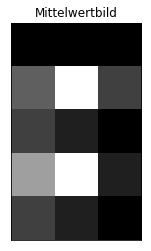

In [22]:
plt.imshow(np.flipud(np.transpose(mean_vector[::-1].reshape((5,3)))).T, origin='lower',
                                  cmap=plt.cm.gray_r, interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('Mittelwertbild')
plt.show()

In [23]:
#eig_pairs = [(eig_vals[i], eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs = [(eig_val_cov[i], eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]
eig_pairs = sorted(eig_pairs, key=lambda k:k[0], reverse=True)

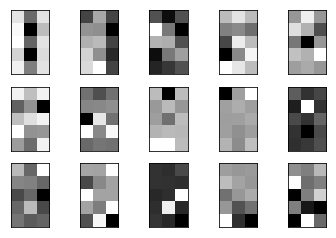

In [24]:
for i in range(len(eig_val_cov)):
    eig_vec = eig_pairs[i][1]
    plt.subplot(3,5,i+1)
    #b1 = np.flipud(np.transpose(num[i,:].reshape((5,3))))
    b1 = np.flipud(np.transpose(eig_vec[::-1].reshape((5,3))))
    plt.imshow(b1.T, origin='lower', cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])

Sortierte Eigenvektoren werden in Eigenvektormatrix zusammengefasst.

In [25]:
eig_vec_mat = []
for i in range(len(eig_val_cov)):
    eig_vec_mat.append(eig_pairs[i][1])
#print(eig_vec_mat)

Erste n Eigenvektoren werden ausgewählt.

In [38]:
n = 15
eig_vec_mat_red = np.array(eig_vec_mat[0:n+1])

In [39]:
x = np.dot(np.dot(all_samples_mf,np.transpose(eig_vec_mat_red)),eig_vec_mat_red)

In [40]:
res = x + np.hstack(mean_vector)

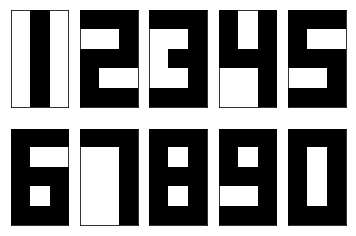

In [41]:
for i in range(res.shape[0]):
    plt.subplot(2,5,i+1)
    #b1 = np.flipud(np.transpose(num[i,:].reshape((5,3))))
    b1 = np.flipud(np.transpose(res[i,::-1].reshape((5,3))))
    plt.imshow(b1.T, origin='lower', cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])